# Import the collected solvent data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('solvent.csv')

### Validate Molecular Validity

In [3]:
from rdkit import Chem
from rdkit.Chem import SanitizeMol, SanitizeFlags

def is_reasonable_molecule(mol):
    try:
        SanitizeMol(mol, catchErrors=True)
        return True
    except ValueError:
        return False
def check_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False, "Invalid SMILES"
    
    if not is_reasonable_molecule(mol):
        return False, "Unreasonable molecule structure"
    
    return True, "Valid and reasonable"

In [6]:
for smiles in df['solvent_smiles']:
    valid, reason = check_smiles(smiles)
    if not valid:
        print(f"SMILES: {smiles}, Check Result: {valid}, Reason: {reason}")
print(f"All SMILES are  Reasonable")

All SMILES are  Reasonable


### Retrieve Molecular Information from PubChem

In [7]:
from pubchempy import Compound, get_compounds
from rdkit import Chem

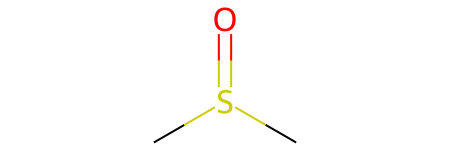

In [8]:
name = 'Dimethyl sulfoxide'
cs = get_compounds(name, 'name')[0]
smile = cs.isomeric_smiles
smile = Chem.MolToSmiles(Chem.MolFromSmiles(smile))
Chem.MolFromSmiles(smile)

In [9]:
df[df['solvent_smiles']==smile]

,solvent_smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfone,fr_thiophene,fr_urea
60,CS(C)=O,10.472222,10.472222,2.75463,-2.897569,0.398185,37.25,78.136,72.088,78.013936,...,0,0,0,0,0,0,0,0,0,0


# Calculate RDKit Molecular Descriptors

In [10]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [11]:
def rd_d (smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)
    desc_names = calc.GetDescriptorNames()
    Mol_descriptor = []
    for mol in mols:
        mol = Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptor.append(descriptors)
    return Mol_descriptor, desc_names

In [12]:
D, D_name = rd_d(df['solvent_smiles'])

[18:32:01] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:01] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:01] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:01] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:01] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:01] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:01] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:01] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:02] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\Descriptors\Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[18:32:03] 

****
Pre-condition Violation
bad result vector size
Violation occurred on l

In [13]:
df1 = pd.DataFrame(D, columns=D_name)
df1 = df1.dropna(axis=1, how='any')
df1 = df1.loc[:, (df1.nunique() != 1)]

In [14]:
df2 = pd.concat([df, df1], axis=1)

In [17]:
df2.to_csv('solvent.csv', index=False)

# Calculate Mordred Molecular Descriptors

In [11]:
def Mordred_input(smiles):
    writer = Chem.SmilesWriter('input.smi', includeHeader=False)
    for smi in smiles:
        m = Chem.MolFromSmiles(smi)
        writer.write(m)
    writer.close()

In [26]:
Mordred_input(df['solvent_smiles'])

In [240]:
df1 = pd.read_csv('solvent_Mordred.csv')
df1 = df1.dropna(axis=1, how='any')
df1 = df1.loc[:, (df1.nunique() != 1)]
df1 = df1.drop('name', axis=1)

In [241]:
df1

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,0,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,2.121320,0.424264,...,0.0,7.625107,29.418928,131.930033,16.491254,16,0,20,16,1.000000
1,0,0,8.424292,2.135779,4.271558,8.424292,1.053037,2.911963,2.618036,0.327255,...,0.0,8.297793,35.071670,116.094963,5.804748,65,8,32,33,1.888889
2,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,1.931852,0.482963,...,0.0,6.188264,24.179697,97.969005,12.246126,9,0,12,9,1.000000
3,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,1.931852,0.482963,...,0.0,6.188264,24.179697,95.953355,15.992226,9,0,12,9,1.000000
4,0,2,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,1.946498,0.486624,...,0.0,5.509388,22.328143,60.068748,5.005729,10,1,10,8,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0,0,15.750491,1.949856,3.899712,15.750491,1.211576,3.372523,3.354527,0.258041,...,0.0,7.826044,40.245095,186.198365,4.774317,364,10,46,44,3.500000
344,0,0,19.675903,1.965946,3.931892,19.675903,1.229744,3.583262,3.701529,0.231346,...,0.0,8.089789,44.454249,226.266051,4.525321,680,13,58,56,4.250000
345,0,0,12.527341,2.311476,4.622953,12.527341,1.138849,3.302522,3.102509,0.282046,...,0.0,9.182249,41.326257,148.125201,5.486119,152,13,54,59,2.333333
346,0,0,8.565187,2.042079,4.084158,8.565187,1.070648,2.899769,2.639318,0.329915,...,0.0,7.884200,34.080836,116.083730,5.804186,71,6,30,29,2.000000


# Calculate Molecular Fingerprint Descriptors

In [287]:
mols = [Chem.MolFromSmiles(smi) for smi in df['solvent_smiles']]

### MACCS Fingerprint

In [102]:
from rdkit.Chem import MACCSkeys
Mkeys_FP = list(np.array(MACCSkeys.GenMACCSKeys(mols[0])).reshape(1,-1).squeeze() for mol in mols)
df1 = pd.DataFrame(Mkeys_FP)

### Avalon Fingerprint

In [288]:
from rdkit.Avalon import pyAvalonTools
Av_FP = list(np.array(pyAvalonTools.GetAvalonFP(mol, nBits=512)) for mol in mols)
df1 = pd.DataFrame(Av_FP)

### Atom-Pairs Fingerprint

In [134]:
from rdkit.Chem import rdMolDescriptors
AP_FP = list(np.array(rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=512)) for mol in mols)
df1 = pd.DataFrame(AP_FP)

### Topological-Torsions Fingerprint

In [122]:
TT_FP = list(np.array(rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=512)) for mol in mols)
df1 = pd.DataFrame(TT_FP)

### Morgan-Circular Fingerprints(Circular Fingerprints)

In [128]:
onbits = {}
mf_FP = list(np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512)) for mol in mols)
df1 = pd.DataFrame(mf_FP)

### RDkit Fingerprints

In [131]:
Rdk_FP = list(np.array(AllChem.RDKFingerprint(mol, maxPath=5, fpSize=512)) for mol in mols)
df1 = pd.DataFrame(mf_FP)